In [283]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.optimize import curve_fit
#import mpmath as mm
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    






#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
#m = 1.
#c = 1.
theta_e = 10.
#w without specific declear should of value 10
w = 10.
#theta_e_1 = 10.
#nu_c = 1
#B = 10.
#e = 1


#constants in Gaussian cgs units (values from harmony)
m = 9.1093826e-28
c = 2.99792458e10
e = 4.80320680e-10
B = 30.
#n_e = 4.
h = 6.6260755e-27
k = 1.380658e-16
T_e = m * c**2 * theta_e / k


#variables to be set (frequency, observer angle, width of delta function, electron number density, 
# sum index n)

kappa = 3.5
theta = 12.*np.pi/36.
epsilon = 0.01
n_e = 1.
nu_c = e * B / (2. * np.pi * m * c)
nu = 100 * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)
nu_k = nu_c * w**2. * np.sin(theta)
nu_w = nu_c * (w * kappa)**2 * np.sin(theta)
#n_e_nt = 2.
#p_PL = 2.2
p_PL = 2.5
gamma_50_min = 1.
gamma_50_max = 1000.
#gamma_50_max = 100.
C = 1.
n_dn = (nu / nu_c) * abs(np.sin(theta))
Index_cutoff = 0.001

gamma_cutoff = 100000000000.
#print nu_c

In [284]:
data_kappa_V_anu_3_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_B_30_T_10_theta_60.txt')

data_kappa_V_anu_3_B_30_T_4_theta_80_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_B_30_T_4_theta_80_n_2.txt')

data_kappa_V_anu_3_B_20_T_5_theta_80_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_B_20_T_5_theta_80_n_2.txt')



data_kappa_V_anu_3_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60.txt')

data_kappa_V_anu_3_5_B_20_T_8_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_20_T_8_theta_60.txt')
data_kappa_V_anu_3_5_B_10_T_10_theta_40 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_10_T_10_theta_40.txt')

data_kappa_V_anu_3_5_B_30_T_5_theta_10 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_5_theta_10.txt')
data_kappa_V_anu_3_5_B_30_T_5_theta_20 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_5_theta_20.txt')
data_kappa_V_anu_3_5_B_30_T_5_theta_30 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_5_theta_30.txt')
data_kappa_V_anu_3_5_B_30_T_5_theta_40 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_5_theta_40.txt')
data_kappa_V_anu_3_5_B_30_T_5_theta_50 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_5_theta_50.txt')
data_kappa_V_anu_3_5_B_30_T_5_theta_70 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_5_theta_70.txt')

data_kappa_V_anu_3_5_B_30_T_5_theta_80 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_5_theta_80.txt')

data_kappa_V_anu_3_5_B_10_T_5_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_10_T_5_theta_60.txt')
data_kappa_V_anu_3_5_B_20_T_5_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_20_T_5_theta_60.txt')
data_kappa_V_anu_3_5_B_50_T_5_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_50_T_5_theta_60.txt')



data_kappa_V_anu_3_5_B_50_T_6_theta_20 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_50_T_6_theta_20.txt')


data_kappa_V_anu_3_5_B_30_T_10_theta_60_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_60_n_2.txt')

data_kappa_V_anu_3_5_B_1_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_1_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_10_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_10_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_20_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_20_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_40_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_40_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_50_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_50_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_60_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_60_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_70_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_70_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_80_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_80_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_100_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_100_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_200_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_200_T_10_theta_60.txt')
data_kappa_V_anu_3_5_B_500_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_500_T_10_theta_60.txt')



data_kappa_V_anu_3_5_B_30_T_3_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_3_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_4_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_4_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_5_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_5_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_6_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_6_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_7_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_7_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_8_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_8_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_20_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_20_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_30_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_30_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_50_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_50_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_60_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_60_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_100_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_100_theta_60.txt')
data_kappa_V_anu_3_5_B_30_T_200_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_200_theta_60.txt')

data_kappa_V_anu_3_5_B_30_T_10_theta_10 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_10.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_20 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_20.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_30 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_30.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_40 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_40.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_50 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_50.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_70 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_70.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_80 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_80.txt')
data_kappa_V_anu_3_5_B_30_T_10_theta_85 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_10_theta_85.txt')


data_kappa_V_anu_3_5_B_30_T_30_theta_30 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_30_theta_30.txt')

data_kappa_V_anu_3_5_B_30_T_7_theta_70 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_3_5_B_30_T_7_theta_70.txt')


data_kappa_V_anu_4_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_4_B_30_T_10_theta_60.txt')

data_kappa_V_anu_4_B_30_T_6_theta_70_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_4_B_30_T_6_theta_70_n_2.txt')



data_kappa_V_anu_4_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_4_5_B_30_T_10_theta_60.txt')

data_kappa_V_anu_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_5_B_30_T_10_theta_60.txt')

data_kappa_V_anu_5_B_10_T_20_theta_40_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_5_B_10_T_20_theta_40_n_2.txt')

data_kappa_V_anu_5_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_5_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_6_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_6_B_30_T_10_theta_60.txt')
data_kappa_V_anu_6_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_6_5_B_30_T_10_theta_60.txt')
data_kappa_V_anu_7_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_7_B_30_T_10_theta_60.txt')











In [285]:
def kappa_low(nuratio):
    nu = nuratio * nu_c
    X = nu/nu_w
    norm = 4. * np.pi * special.gamma(kappa-4./3.) / (3.**(7./3.) * special.gamma(kappa-2.))
    dimensional = (n_e * e**2.)/(c * kappa**2. * w**2.)
    ans = norm * dimensional * nu_w * X**(1./3.)
    return ans

def kappa_high(nuratio):
    nu = nuratio * nu_c
    X = nu/nu_w
    term1 = (1./4.) * 3.**((kappa-1.)/2.) * (kappa-2.) * (kappa-1.)
    term2 = special.gamma(kappa/4. - 1./3.) * special.gamma(kappa/4. + 4./3.) 
    term3 = (n_e * e**2. * nu_c * np.sin(theta)) / c
    ans = term1*term2*term3 * X**(-(kappa-2.)/2.)
    return ans




def anu_low(nuratio):
    
    nu = nuratio * nu_c
    
    term1 = n_e * 3. * 3.**(1./6.) * e * (-2. + kappa) * (kappa - 1.) * kappa
    term2 = (2. * np.pi)**(1./3.) * (kappa * w)**(-2. + kappa)
    term3 = (1./np.sin(theta)) * special.gamma(5./3.)
    term4 = special.hyp2f1(-1./3. + kappa, 1. + kappa, 2./3. + kappa, -kappa * w)
    term5 = B*(-1.+3.*kappa)*((m*nu)/(B*e*np.sin(theta)))**(5./3.)
    
    f = term1*term2*term3*term4/term5
    
    
    return f
    

    
    
def anu_high(nuratio):
    
    nu = nuratio * nu_c
    
    term1 = n_e/(3. * B * (2. + kappa))
    term2 = 2.**((-1./2.) - kappa) * e * (- 2. + kappa ) * (-1. + kappa) * kappa
    term3 = np.pi**(1. - kappa) * (kappa * w)**(-2. + kappa)
    term4 = 1./np.sin(theta)
    term5 = 2.**(1. + kappa/2.) * np.pi**(kappa/2.) * special.gamma(2. + kappa/2.)
    term6 = 2**(1. + kappa/2.) * np.pi**(kappa/2.) + kappa * (2. * np.pi)**(kappa/2.)
    term7 = special.gammainc(1. + kappa/2., 2. * c * m * nu * np.pi / (B * e * np.sin(theta)))
    term8 = (B * e * np.sin(theta)/(c * m * nu))**((3. + kappa)/2.)
    
    f = term1 * term2 * term3 * term4 * (term5 - term6 * term7) * term8

    return f

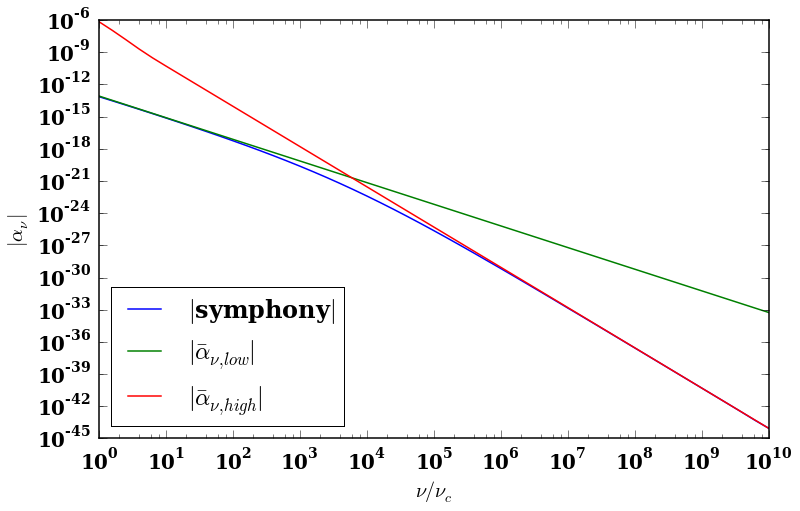

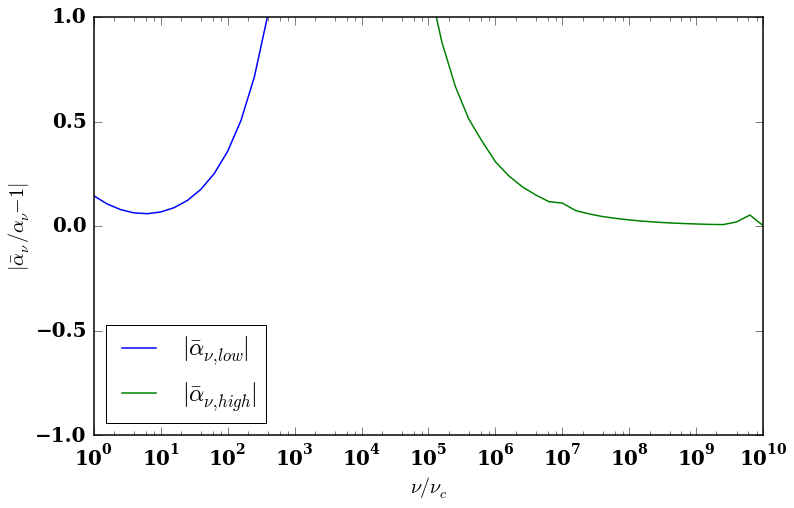

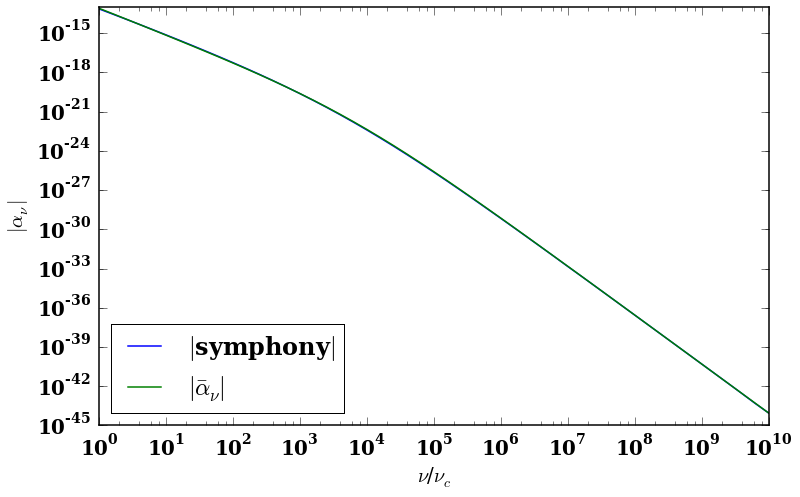

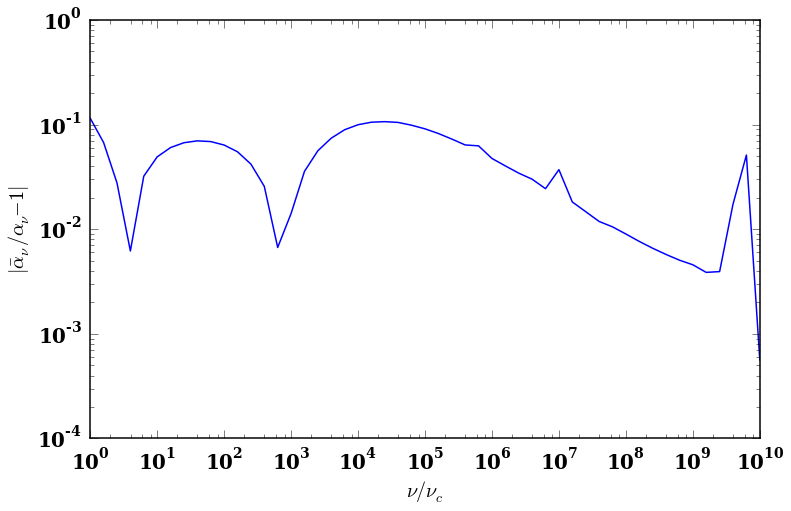

In [291]:
x_7 = data_kappa_V_anu_3_5_B_30_T_10_theta_60[:,0]
y_7 = -data_kappa_V_anu_3_5_B_30_T_10_theta_60[:,1]


AA = 1.5e-20

BB = -0.35

B_DEPEN = 1.

#W_DEPEN_LO = 1.03974548e+01 * w**(-1.02658415e+00) + (-9.04235612e-05) * w + 1.98726416e-02

#THETA_DEPEN_LO = (2.07612482 * (np.sin(theta))**(-2.82113811) + -2.08612611)**0.44599908

THETA_DEPEN_LO = (52./25.)**(223./500.) * (np.sin(theta)**(-141./50.) - 1.)**(223./500.)
W_DEPEN_LO = 10.3/w


def anu_low_8(nuratio):
    
    nu = nuratio * nu_c
    
    X = nu/nu_k
    
    f = THETA_DEPEN_LO * W_DEPEN_LO * B_DEPEN * AA * anu_low(nuratio) * X**BB
    return f


#CC = 1.66663742e+02 * kappa**(-7.00758904e+00) + 5.21904290e-03 * kappa**2. + (-5.25819444e-02) * kappa + 2.35122131e-01


CC = 13.**2. * kappa**(-7.) + 13./2500 * kappa**2. + (-263./5000.) * kappa + 47./200.



DD = -50./100.

B_DEPEN_HI = 1.

#W_DEPEN_HI =  8.09984539e+00 * w**(-8.71639793e-01) + 3.29635247e-04 * w + (-9.07310510e-02)

#THETA_DEPEN_HI = (2.9024073 * np.sin(theta)**(-2.0509276) -2.90251305)**(0.497551) 

THETA_DEPEN_HI = (29./10.)**(1./2.) * (np.sin(theta)**(-41./20) - 1.)**(1./2.)
W_DEPEN_HI = 8.4 * w**(-116./125.)

def anu_high_9(nuratio):
    
    nu = nuratio * nu_c
    
    X = nu/nu_k
    
    f = THETA_DEPEN_HI * W_DEPEN_HI * B_DEPEN_HI * CC * anu_high(nuratio) * X**DD
    
    return f



def total_fitting_anu_V(nuratio, PRE):
    
    term1 = anu_low_8(nuratio)
    term2 = anu_high_9(nuratio)
    
    f= (1./((1./term1)**(PRE) + (1./term2)**(PRE)))**(1./PRE)

    return f

#print curve_fit(total_fitting_anu_V, x_7, y_7)



pl.loglog(x_7, y_7, label = '$|$symphony$|$')
pl.loglog(x_7, anu_low_8(x_7), label = '$|\\bar{\\alpha}_{\\nu, low}|$')
pl.loglog(x_7, anu_high_9(x_7), label = '$|\\bar{\\alpha}_{\\nu, high}|$')
pl.xlabel("$\\nu/\\nu_c$")
pl.ylabel("$|\\alpha_\\nu|$")
pl.legend(loc = 'lower left')
pl.show()


pl.semilogx(x_7, anu_low_8(x_7)/y_7 - 1., label = '$|\\bar{\\alpha}_{\\nu, low}|$')
pl.semilogx(x_7, anu_high_9(x_7)/y_7 - 1., label = '$|\\bar{\\alpha}_{\\nu, high}|$')

pl.xlabel("$\\nu/\\nu_c$")
pl.ylabel("$|\\bar{\\alpha}_\\nu / \\alpha_{\\nu} - 1|$")
pl.ylim([-1,1])
pl.legend(loc = 'lower left')
pl.show()


#pl.semilogx(x_7, 0*x_7)
#pl.semilogx(x_7, 0*x_7 + 0.1)
#pl.semilogx(x_7, 0*x_7 - 0.1)
#pl.semilogx(x_7, 0*x_7 + 0.2)
#pl.semilogx(x_7, 0*x_7 - 0.2)
#pl.ylim([-1,1])


#pl.legend()
#pl.show()


#PRE_HERE = 1.2196691 * kappa**(-1.13225465) + 0.00771614

PRE_HERE = 61./50. * kappa**(-142./125.) + 7./1000.


pl.loglog(x_7, y_7, label = '$|$symphony$|$')
pl.loglog(x_7, total_fitting_anu_V(x_7,PRE_HERE), label = '$|\\bar{\\alpha}_{\\nu}|$')

pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("$|\\alpha_\\nu|$")
pl.legend(loc = 'lower left')
pl.show()

pl.loglog(x_7, abs(total_fitting_anu_V(x_7,PRE_HERE)/(y_7) - 1.))
#pl.semilogx(x_7, 0*x_7)
#pl.semilogx(x_7, 0*x_7 + 0.1)
#pl.semilogx(x_7, 0*x_7 - 0.1)
#pl.semilogx(x_7, 0*x_7 + 0.2)
#pl.semilogx(x_7, 0*x_7 - 0.2)
#pl.ylim([-0.4,0.4])
#pl.show()


pl.xlabel("$\\nu/\\nu_c$")
pl.ylabel("$|\\bar{\\alpha}_\\nu/\\alpha_{\\nu} - 1|$")
pl.legend(loc = 'lower left')
pl.show()




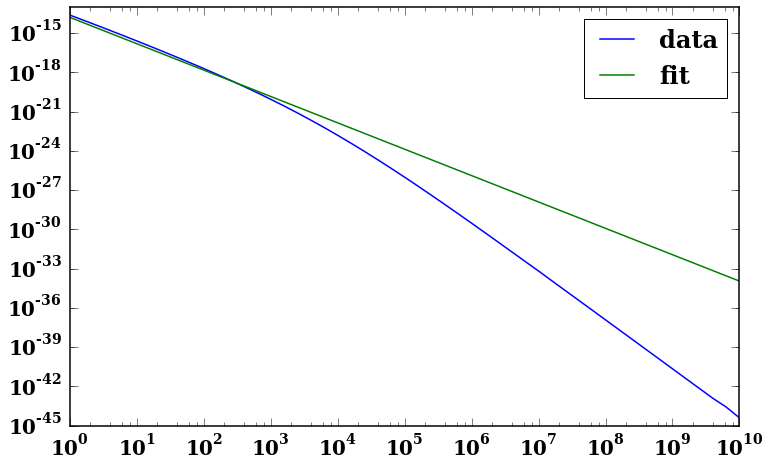

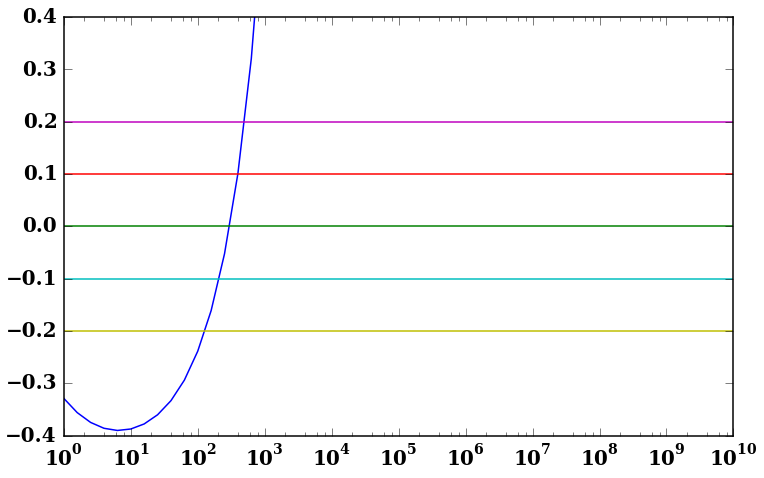

In [164]:
x_8 = data_kappa_V_anu_3_5_B_30_T_10_theta_80[:,0]
y_8 = -data_kappa_V_anu_3_5_B_30_T_10_theta_80[:,1]



AA = 1.5e-20

BB = -0.35

B_DEPEN = 1.

W_DEPEN_LO = 1.03974548e+01 * w**(-1.02658415e+00) + (-9.04235612e-05) * w + 1.98726416e-02

#W_DEPEN_LO = 1.

#W_DEPEN_LO = 10.3/w
THETA_DEPEN_LO = (2.07612482 * (np.sin(theta))**(-2.82113811) + -2.08612611)**0.44599908

#THETA_DEPEN_LO = 1



#print THETA_DEPEN_LO

def anu_low_8(nuratio):
    
    nu = nuratio * nu_c
    
    X = nu/nu_k
    
    f = THETA_DEPEN_LO * W_DEPEN_LO * B_DEPEN * AA * anu_low(nuratio) * X**BB
    return f

pl.loglog(x_8, y_8, label = 'data')
pl.loglog(x_8, anu_low_8(x_8), label = 'fit')

pl.legend()
pl.show()


pl.semilogx(x_8, anu_low_8(x_8)/y_8 - 1.)

pl.semilogx(x_8, 0*x_8)
pl.semilogx(x_8, 0*x_8 + 0.1)
pl.semilogx(x_8, 0*x_8 - 0.1)
pl.semilogx(x_8, 0*x_8 + 0.2)
pl.semilogx(x_8, 0*x_8 - 0.2)
pl.ylim([-0.4,0.4])


pl.legend()
pl.show()

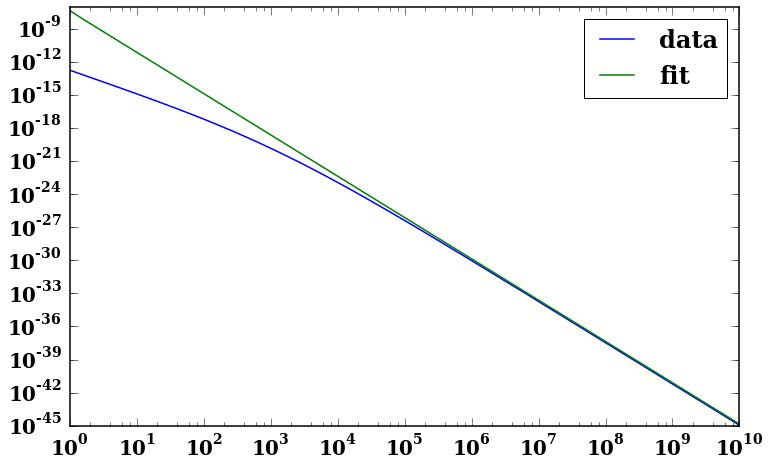

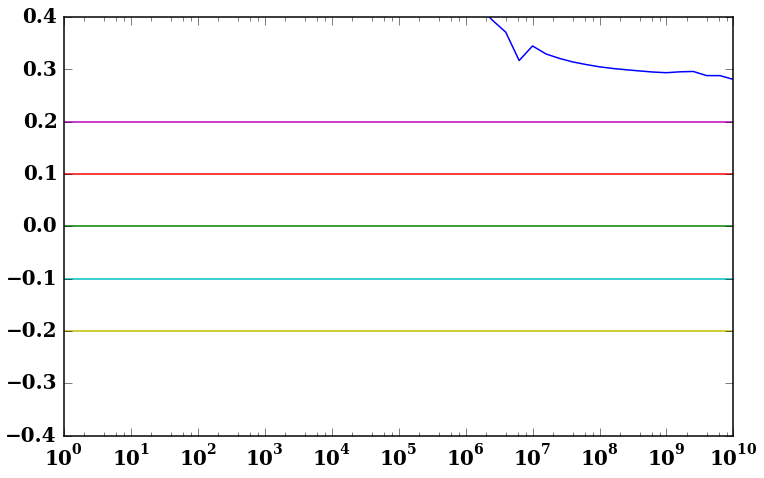

In [74]:
x_9 = data_kappa_V_anu_3_5_B_30_T_10_theta_10[:,0]
y_9 = -data_kappa_V_anu_3_5_B_30_T_10_theta_10[:,1]

CC = 1.66663742e+02 * kappa**(-7.00758904e+00) + 5.21904290e-03 * kappa**2. + (-5.25819444e-02) * kappa + 2.35122131e-01

DD = -50./100.

B_DEPEN_HI = 1.

W_DEPEN_HI =  8.09984539e+00 * w**(-8.71639793e-01) + 3.29635247e-04 * w + (-9.07310510e-02)

THETA_DEPEN_HI = 10.

def anu_high_9(nuratio):
    
    nu = nuratio * nu_c
    
    X = nu/nu_k
    
    f = THETA_DEPEN_HI * W_DEPEN_HI * B_DEPEN_HI * CC * anu_high(nuratio) * X**DD
    
    return f


pl.loglog(x_9, y_9, label = 'data')
pl.loglog(x_9, anu_high_9(x_9), label = 'fit')

pl.legend()
pl.show()

pl.semilogx(x_9, anu_high_9(x_9)/y_9 - 1.)

pl.semilogx(x_9, 0*x_9)
pl.semilogx(x_9, 0*x_9 + 0.1)
pl.semilogx(x_9, 0*x_9 - 0.1)
pl.semilogx(x_9, 0*x_9 + 0.2)
pl.semilogx(x_9, 0*x_9 - 0.2)

pl.ylim([-0.4, 0.4])

pl.legend()
pl.show()


(array([  1.66663742e+02,  -7.00758904e+00,   5.21904290e-03,
        -5.25819444e-02,   2.35122131e-01]), array([[  8.07254273e+04,  -4.91351413e+02,   3.82434677e-01,
         -4.83380095e+00,   1.53219198e+01],
       [ -4.91351413e+02,   2.99435276e+00,  -2.36299485e-03,
          2.98295508e-02,  -9.44166719e-02],
       [  3.82434677e-01,  -2.36299485e-03,   2.27501794e-06,
         -2.80675830e-05,   8.66319128e-05],
       [ -4.83380095e+00,   2.98295508e-02,  -2.80675830e-05,
          3.47471198e-04,  -1.07627461e-03],
       [  1.53219198e+01,  -9.44166719e-02,   8.66319128e-05,
         -1.07627461e-03,   3.34629475e-03]]))


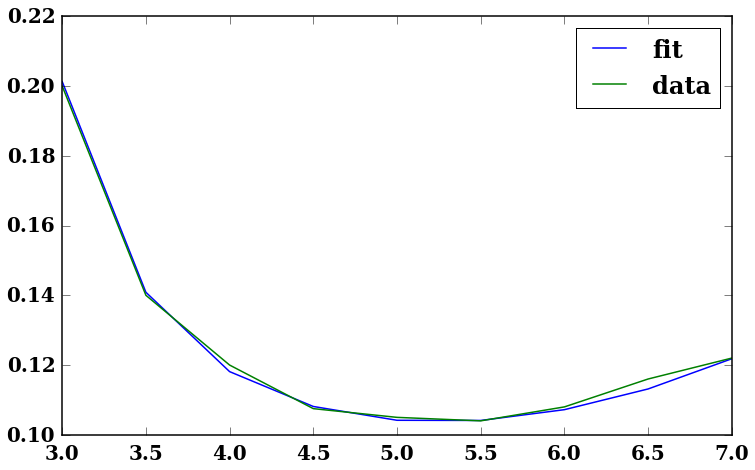

In [253]:
data_kappa_V_anu_high_CC = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_high_CC.txt')

x_10 = data_kappa_V_anu_high_CC[:,0]
y_10 = data_kappa_V_anu_high_CC[:,1]


def func_115(x, a, b, d, h, g):
    f = a * x**b + d * x**2 + h * x  + g
    return f

print curve_fit(func_115, x_10, y_10, p0 = [1.66664817e+02,  -7.00759560e+00,   5.21904823e-03,-5.25820114e-02,   2.35122343e-01])

pl.plot(x_10, func_115(x_10, 13.**2.,-7.,13./2500.,-263./5000., 47./200.), label = 'fit')

pl.plot(x_10, y_10, label = 'data')

pl.legend()

#pl.ylim([8000, 18000])






(array([ 10.29615927,  -1.01360426]), array([[  8.03311125e-03,  -4.90505083e-04],
       [ -4.90505083e-04,   3.22900153e-05]]))


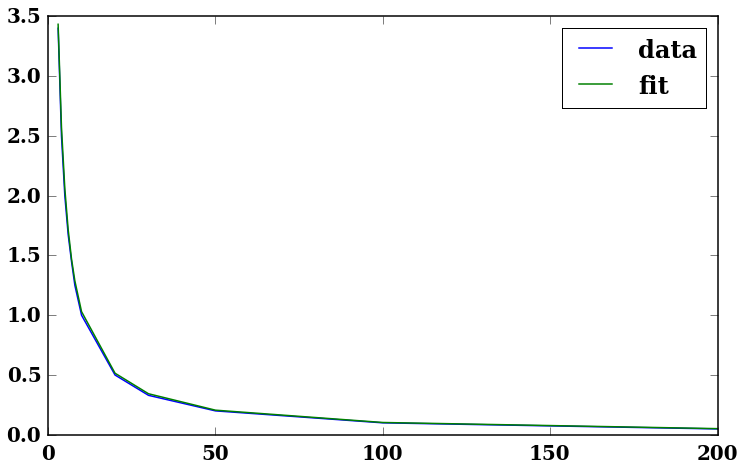

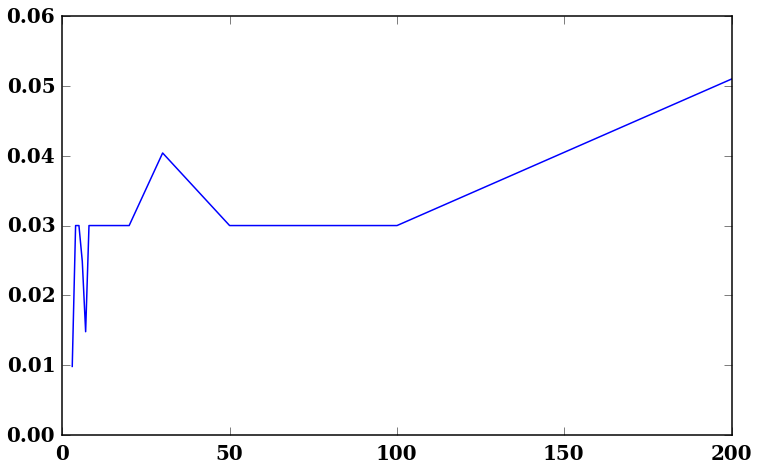

In [188]:
data_kappa_V_anu_low_W_DEPEN = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_low_W_DEPEN.txt')
x_173 = data_kappa_V_anu_low_W_DEPEN[:,0]
y_173 = data_kappa_V_anu_low_W_DEPEN[:,1]

def func_173(x,a,b):
    f = a * x**b
    return f

print curve_fit(func_173, x_173, y_173, p0 = [10.29615921,  -1.01360426])

pl.plot(x_173, y_173, label = 'data')

pl.plot(x_173, func_173(x_173, 10.3,  -1.), label = 'fit')

pl.legend()

pl.show()


pl.plot(x_173, func_173(x_173, 10.3,  -1.)/y_173 - 1.)



In [42]:
func_173(3., 1.03974548e+01,  -1.02658415e+00,  -9.04235612e-05,1.98726416e-02)

3.385661916093756

(array([ 8.41987188, -0.92766701]), array([[ 0.02097017, -0.00152519],
       [-0.00152519,  0.00012026]]))


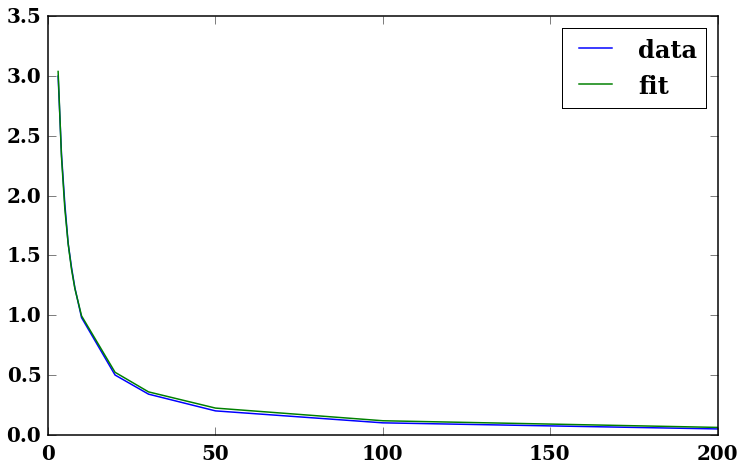

(-0.4, 0.4)

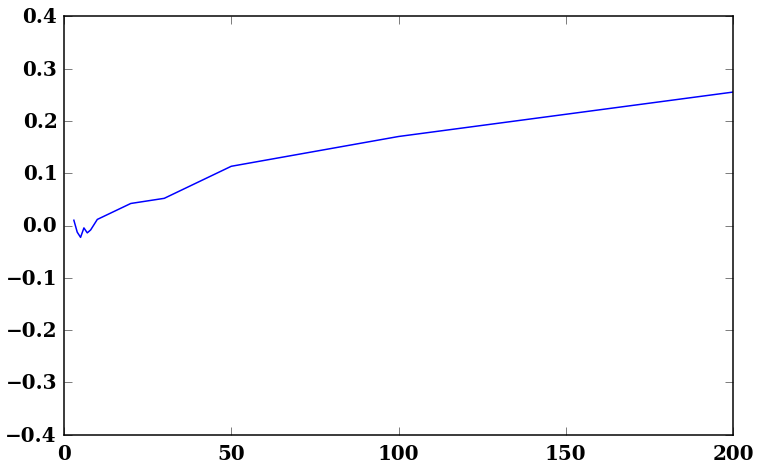

In [218]:
data_kappa_V_anu_high_W_DEPEN = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_high_W_DEPEN.txt')
x_174 = data_kappa_V_anu_high_W_DEPEN[:,0]
y_174 = data_kappa_V_anu_high_W_DEPEN[:,1]

def func_174(x,a, b):
    f = a * x**b
    return f

print curve_fit(func_174, x_174, y_174, p0 = [8.41987283, -0.92766708])

pl.plot(x_174, y_174, label = 'data')

pl.plot(x_174, func_174(x_174,8.41987188, -0.92766701), label = 'fit')

pl.legend()

pl.show()


pl.plot(x_174, func_174(x_174, 8.4, -116./125.)/y_174 - 1.)
pl.ylim([-0.4,0.4])


In [139]:
func_174(3, 8.09984539e+00,  -8.71639793e-01,   3.29635247e-04,-9.07310510e-02)

3.0191013357133722

(array([ 2.07612475, -2.82113863, -2.08612609,  0.44599901]), array([[ 0.00166258,  0.00186046, -0.00164095,  0.00019154],
       [ 0.00186046,  0.00733817, -0.00161527,  0.00094369],
       [-0.00164095, -0.00161527,  0.00164865, -0.00015839],
       [ 0.00019154,  0.00094369, -0.00015839,  0.00012338]]))


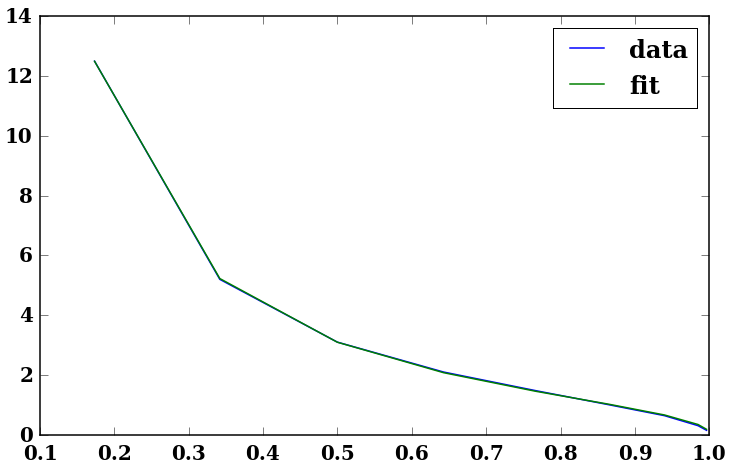

In [144]:
data_kappa_V_anu_low_THETA_DEPEN = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_low_THETA_DEPEN.txt')

x_309 = np.sin(data_kappa_V_anu_low_THETA_DEPEN[:,0] * np.pi / 180.)
y_309 = data_kappa_V_anu_low_THETA_DEPEN[:,1]

def func_309(x, a, b, d, f):
    f = (a * x**b + d)**f
    return f

print curve_fit(func_309, x_309, y_309, p0 = [ 2.07612482, -2.82113811, -2.08612611,  0.44599908])

pl.plot(x_309, y_309, label = 'data')

pl.plot(x_309, func_309(x_309,   52./25., -141./50., -52./25., 223./500.), label = 'fit')

pl.legend()



(array([ 2.9024073 , -2.0509276 , -2.90251305,  0.497551  ]), array([[  5.43399349e-04,   4.04983125e-04,  -5.31297441e-04,
          5.68268009e-05],
       [  4.04983125e-04,   6.66994443e-04,  -3.63005016e-04,
          1.13039513e-04],
       [ -5.31297441e-04,  -3.63005016e-04,   5.27432874e-04,
         -4.91861269e-05],
       [  5.68268009e-05,   1.13039513e-04,  -4.91861269e-05,
          1.96568640e-05]]))


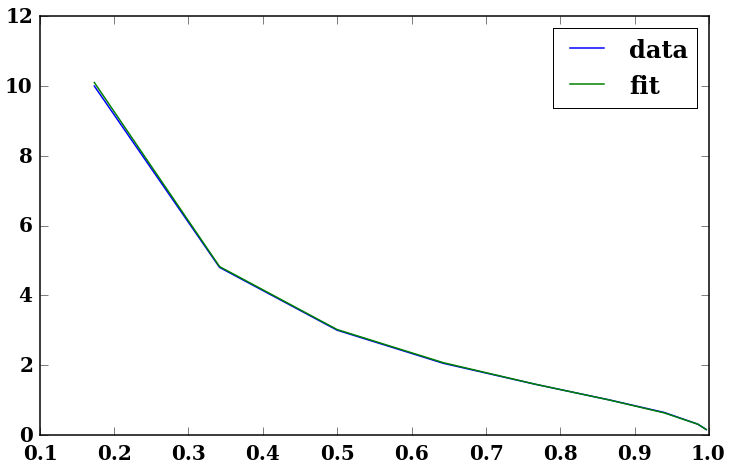

In [150]:
data_kappa_V_anu_high_THETA_DEPEN = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_high_THETA_DEPEN.txt')

x_442 = np.sin(data_kappa_V_anu_high_THETA_DEPEN[:,0] * np.pi / 180.)
y_442 = data_kappa_V_anu_high_THETA_DEPEN[:,1]

def func_442(x ,a, b, d, f):
    f = (a * x**b + d)**f
    return f

print curve_fit(func_442, x_442, y_442, p0 = [2.90240728, -2.05092763, -2.90251304,  0.497551])


pl.plot(x_442, y_442, label = 'data')
pl.plot(x_442, func_442(x_442,   29./10. , -41./20. , -29./10.,  0.5 ), label = 'fit')

pl.legend()









(array([ 1.2196691 , -1.13225465,  0.00771614]), array([[ 0.00637024, -0.00863176,  0.00164189],
       [-0.00863176,  0.01218908, -0.00238279],
       [ 0.00164189, -0.00238279,  0.00047465]]))


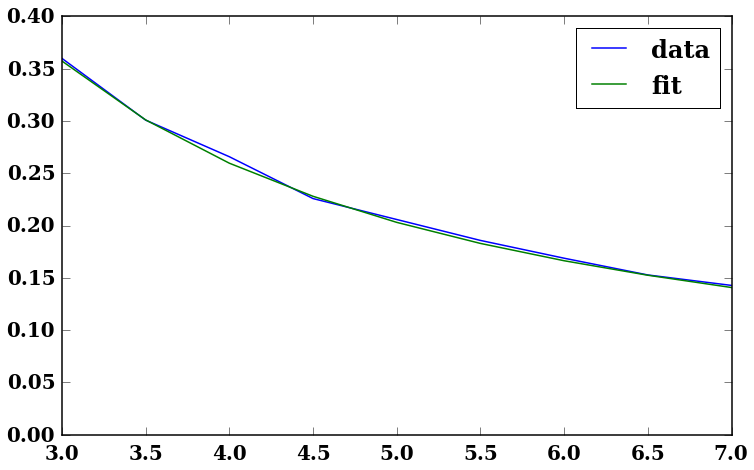

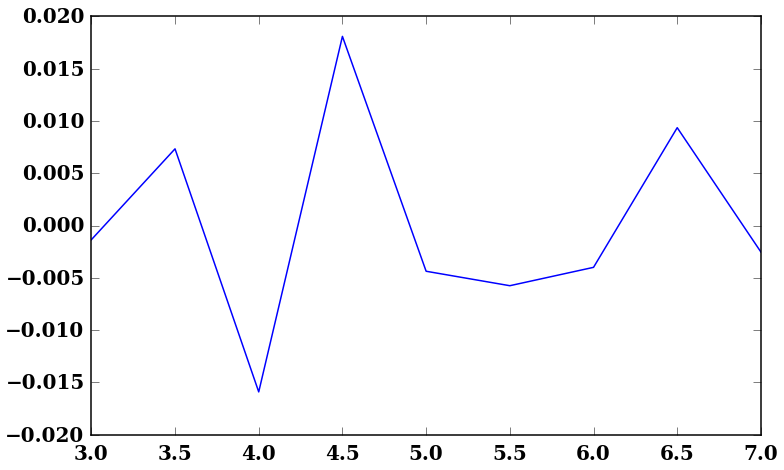

In [275]:
data_kappa_V_anu_total_PRE = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_total_PRE.txt')

x_341 = data_kappa_V_anu_total_PRE[:,0]
y_341 = data_kappa_V_anu_total_PRE[:,1]

def func_435(x, a, b, d):
    f = a * x**(b) + d
    return f

print curve_fit(func_435, x_341, y_341, p0 =[1.2196691 ,  -1.13225465,  0.00771614])

pl.plot(x_341, y_341, label = 'data')
pl.plot(x_341, func_435(x_341,61./50. , -142./125., 7./1000.), label = 'fit')


pl.xlim([3,7])
pl.ylim([0, 0.4])
pl.legend()
pl.show()


pl.plot(x_341, func_435(x_341, 1.2196691 , -1.13225465,  0.00771614)/y_341 - 1.)

#print func_435(3,   25.89470158,  2.85477796)



In [465]:
np.exp(1.)

2.7182818284590451

(array([-0.26294754,  6.62201895,  0.51918029]), array([[ 0.00086552, -0.0200396 ,  0.00104257],
       [-0.0200396 ,  0.46518077, -0.02419884],
       [ 0.00104257, -0.02419884,  0.00136052]]))


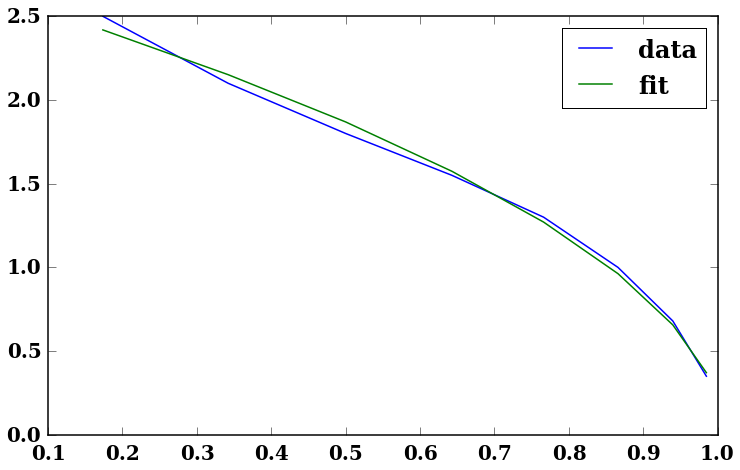

In [175]:
w_here     = 5.

data_116 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_anu_THW_low.txt')

x_116 = np.sin(data_116[:,0] * np.pi / 180.)
y_116 = data_116[:,1]



def func_110(x, a, b, d):
        f = (a * (w_here**2. * x) + b)**(d)
        return f

print curve_fit(func_110, x_116, y_116, p0 = [-0.2629471 ,  6.62200895,  0.51918082])

pl.plot(x_116, y_116, label = 'data')
pl.plot(x_116, func_110(x_116, -0.26294754,  6.62201895,  0.51918029), label = 'fit')


pl.legend()

In [307]:
term1 = 1.5e-20
term2 = (27./500.)*m*c/(np.pi**4.)

print term1/term2

0.990803070904
